# Visão Computacional

## Instalando a biblioteca opencv

In [ ]:
!pip install opencv-python

## importando as bibliotecas

In [ ]:
import cv2 #https://docs.opencv.org/master/index.html
import matplotlib.pyplot as plt #https://matplotlib.org/
import numpy as np #https://numpy.org/

In [ ]:
cv2.__version__

'4.5.2'

## 1 - Carregando imagem

In [ ]:
imagem = cv2.imread('dados/cubo_magico.jpeg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

### imagem em BGR

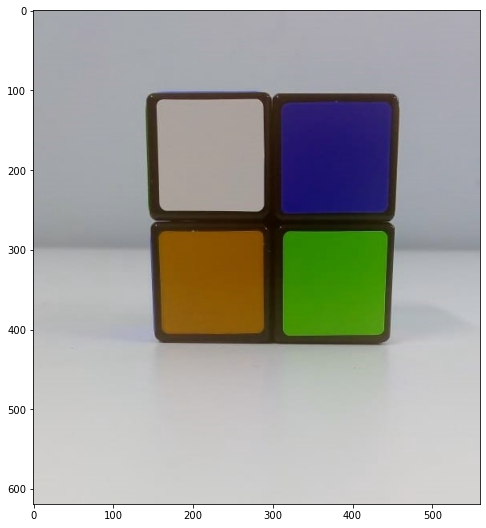

In [ ]:
plt.figure(figsize=(8,18))
plt.imshow(imagem)

### imagem em RGB

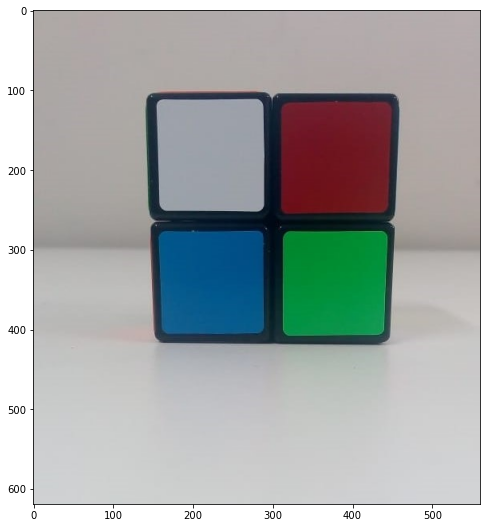

In [ ]:
plt.figure(figsize=(8,18))
plt.imshow(imagem_rgb)

## 2 - Dimensões da imagem

In [ ]:
#altura x largura x camadas
imagem_rgb.shape

(619, 560, 3)

## 3 - Convertendo a imagem para escala de cinza

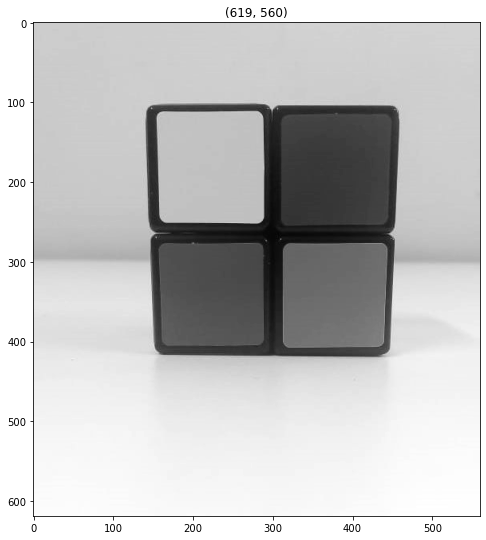

In [ ]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,18))
plt.title(imagem_cinza.shape)
plt.imshow(imagem_cinza, cmap='gray')

## 4 - Exibindo a imagem como a maquina "Enxerga"

![image.png](attachment:image.png)

In [ ]:
imagem_cinza

array([[170, 170, 170, ..., 176, 176, 176],
       [170, 170, 170, ..., 176, 176, 176],
       [170, 170, 170, ..., 176, 176, 176],
       ...,
       [209, 209, 209, ..., 211, 211, 211],
       [209, 209, 209, ..., 211, 211, 211],
       [209, 209, 209, ..., 211, 211, 211]], dtype=uint8)

In [ ]:
imagem_cinza.min(), imagem_cinza.max()

(1, 212)

In [ ]:
elementos_unicos, _ = np.unique(imagem_cinza, return_counts=True)
print(f'Tons de cinza: {len(elementos_unicos)}')
elementos_unicos

Tons de cinza: 212


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## 5 - Binarizando a imagem

In [ ]:
ret,imagem_binarizada = cv2.threshold(imagem_cinza,127,255,cv2.THRESH_BINARY)
elementos_unicos, _ = np.unique(imagem_binarizada, return_counts=True)
elementos_unicos

array([  0, 255], dtype=uint8)

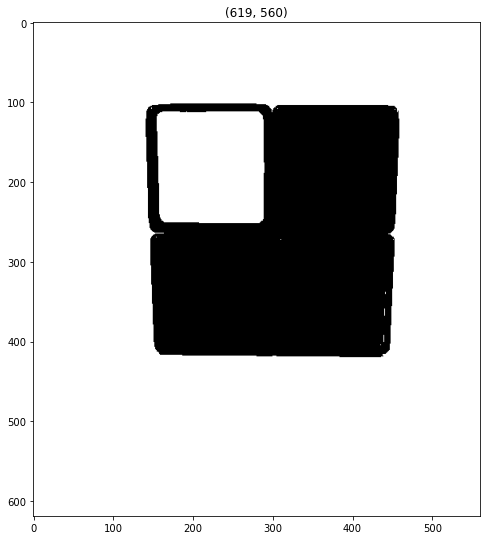

In [ ]:
plt.figure(figsize=(8,18))
plt.title(imagem_binarizada.shape)
plt.imshow(imagem_binarizada, cmap='gray')

## 6 - Visualizando a imagem em varios canais de cores

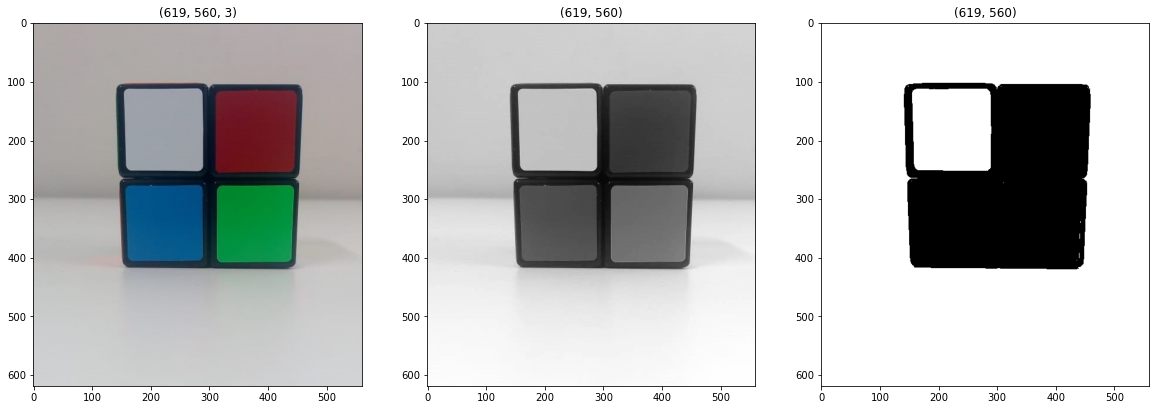

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.title(imagem_rgb.shape)
plt.imshow(imagem_rgb)
plt.subplot(1, 3, 2)
plt.title(imagem_cinza.shape)
plt.imshow(imagem_cinza, cmap='gray')
plt.subplot(1, 3, 3)
plt.title(imagem_binarizada.shape)
plt.imshow(imagem_binarizada, cmap='gray')

## 7 - Aplicação de Filtros

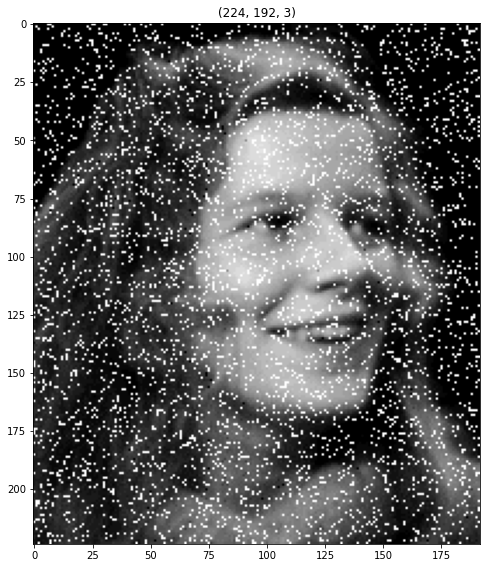

In [ ]:
imagem = cv2.imread('dados/ruido_sal_e_pimenta.png')
plt.figure(figsize=(8,18))
plt.title(imagem.shape)
plt.imshow(imagem)

### 7.1 - Filtro de média

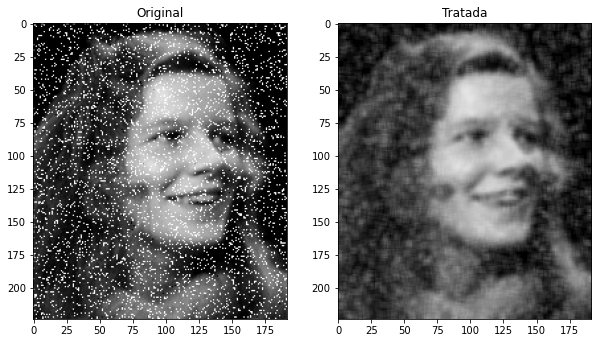

In [ ]:
imagem = cv2.imread("dados/ruido_sal_e_pimenta.png")
imagemTratada = cv2.blur(imagem,(5,5)) #parametros 1 - imagem, 2 - mascara
plt.figure(figsize=(10,20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(imagem)
plt.subplot(1, 2, 2)
plt.title("Tratada")
plt.imshow(imagemTratada)

### 7.2 - Filtro de mediana
![image.png](attachment:image.png)

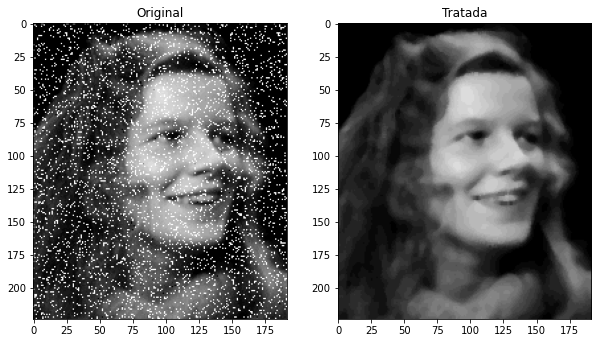

In [ ]:
imagem = cv2.imread("dados/ruido_sal_e_pimenta.png")
imagemTratada = cv2.medianBlur(imagem,5) #parametros 1 - imagem, 2 - um valor interior, que indicará a sua intensidade
plt.figure(figsize=(10,20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(imagem)
plt.subplot(1, 2, 2)
plt.title("Tratada")
plt.imshow(imagemTratada)

## 8 - Realce de bordas

### 8.1 - Detector de bordas de Canny

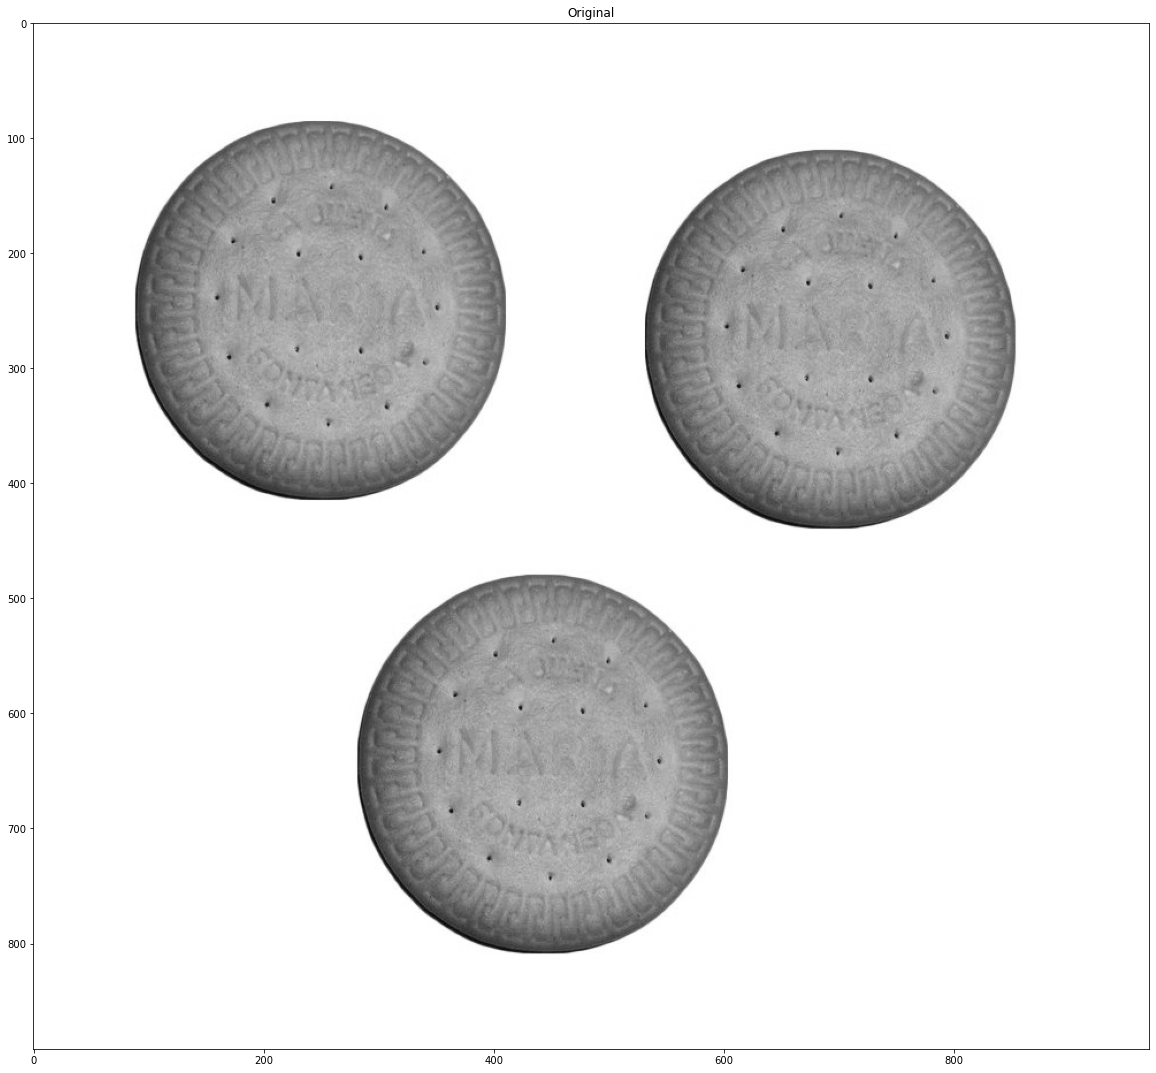

In [ ]:
imagemOriginal = cv2.imread("dados/marie-biscuits-500x500.jpg", 0)
_, imagemBinarizada = cv2.threshold(imagemOriginal, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imagemTratada = cv2.medianBlur(imagemBinarizada,5)
imagemBordas = cv2.Canny(imagemTratada, 100, 200)
plt.figure(figsize=(20,20))
plt.title("Original")
plt.imshow(imagemOriginal, cmap='gray')

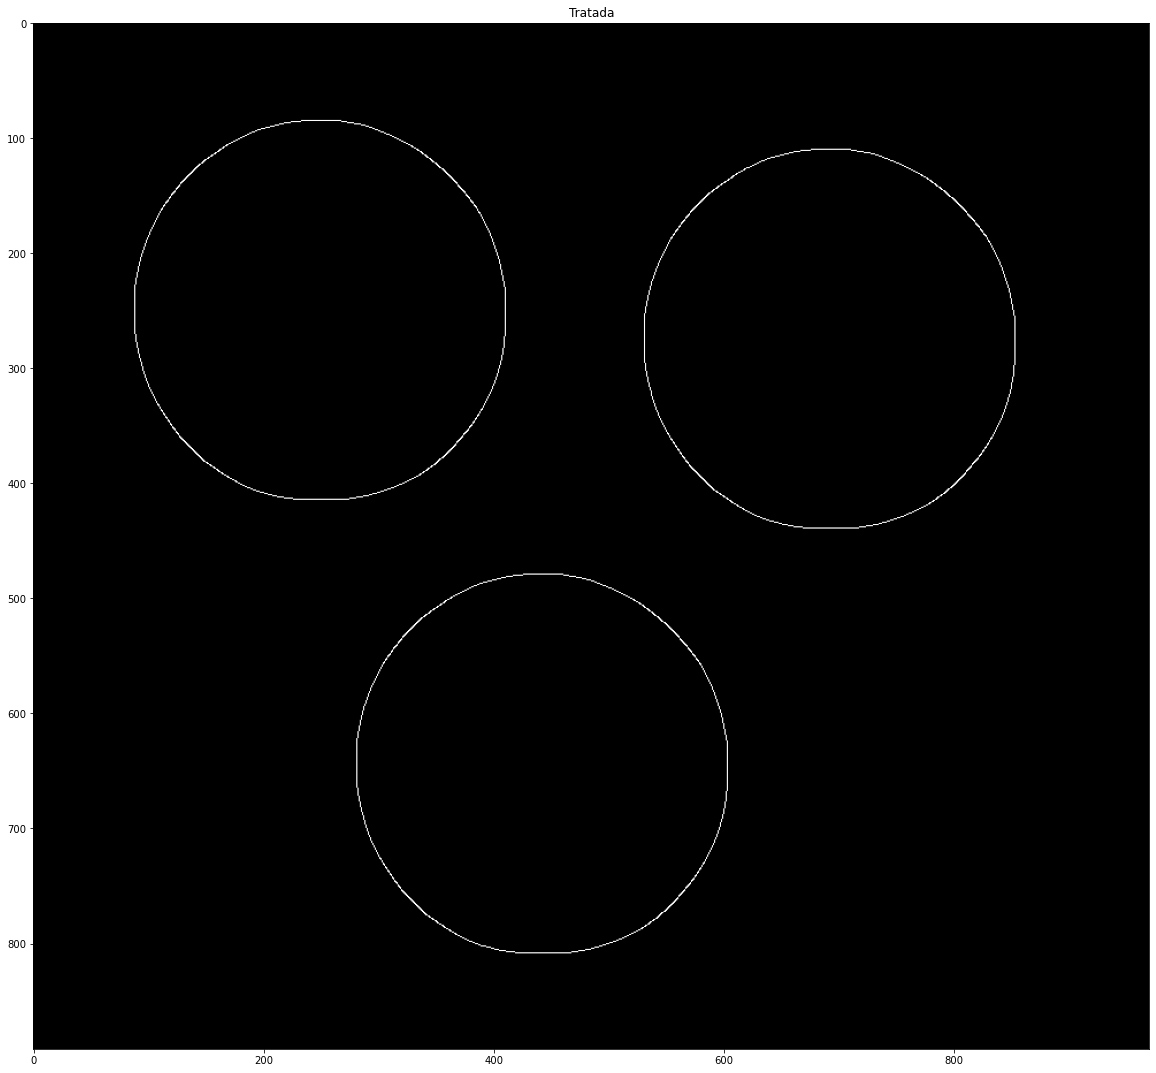

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Tratada")
plt.imshow(imagemBordas,cmap='gray')

## 8.2 - Realce de Imagem

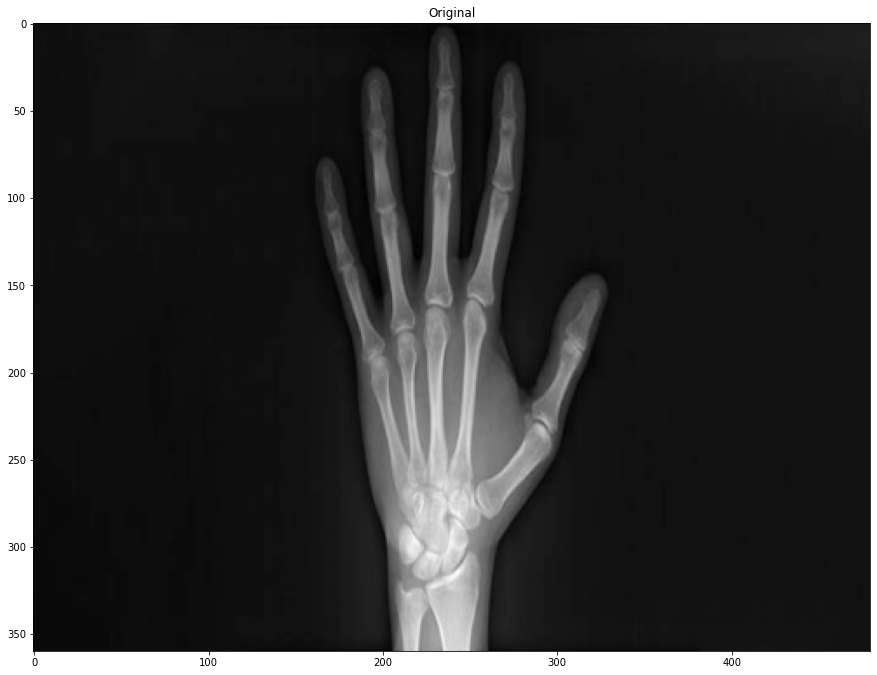

In [ ]:
imagemOriginal = cv2.imread("dados/radiografia_mao.jpg", 0)
imagemOriginal = cv2.resize(imagemOriginal,(480,360))
plt.figure(figsize=(15,20))
plt.title("Original")
plt.imshow(imagemOriginal, cmap="gray")

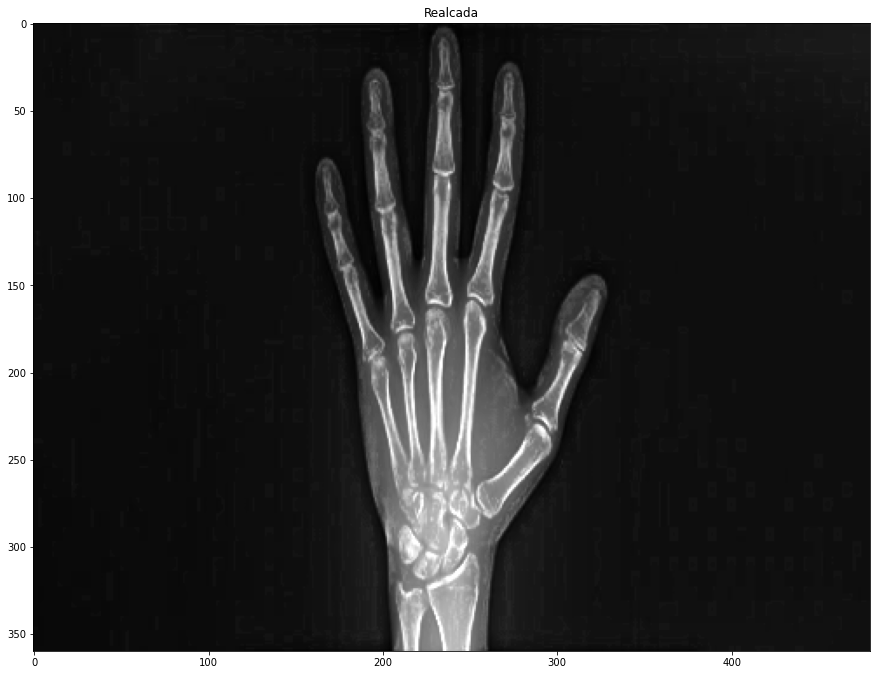

In [ ]:
imagemOriginal = cv2.imread("dados/radiografia_mao.jpg", 0)
imagemOriginal = cv2.resize(imagemOriginal,(480,360))
imagemSuavizada = cv2.GaussianBlur(imagemOriginal,(13,13),3)
imagemDetalhes = 3 * cv2.subtract(imagemOriginal, imagemSuavizada)
imagemRealcada = cv2.add(imagemOriginal, imagemDetalhes)
plt.figure(figsize=(15,20))
plt.title("Realcada")
plt.imshow(imagemRealcada, cmap="gray")

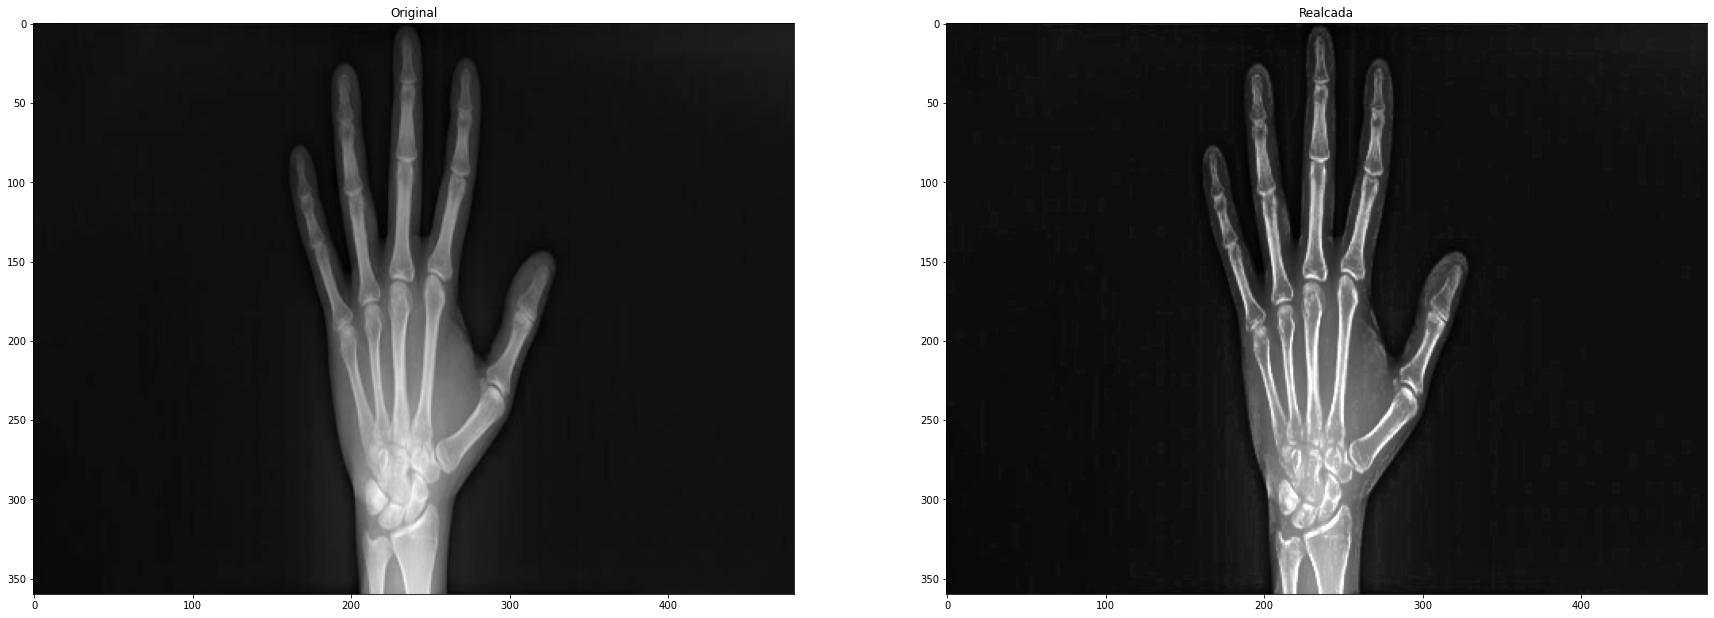

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(imagemOriginal, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Realcada")
plt.imshow(imagemRealcada, cmap="gray")


## 9 - OCR - Optical Character Recognition

In [ ]:
# 1 - Faça Download do Tesseract
#https://pt.osdn.net/projects/sfnet_tesseract-ocr-alt/downloads/tesseract-ocr-setup-3.02.02.exe/
# Documentação - https://tesseract-ocr.github.io/tessdoc/Home.html

# instale o Tesseract no modo visual do windows

In [ ]:
#2 - instale o tesseract no CMD
#pip install pytesseract

In [ ]:
# 3 - Instale o Tesseract no Jupyter
!pip --no-cache-dir install --trusted-host pypi.org --trusted-host files.pythonhosted.org pytesseract

In [ ]:
import pytesseract as ocr

## Exemplo 1

In [ ]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

# If you don't have tesseract executable in your PATH, include the following:
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
#Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'
#pytesseract.pytesseract.tesseract_cmd = r'C:\ProgramData\Anaconda3\Lib\site-packages\pytesseract'

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

In [ ]:
# Concersão simples de imagem em texto
text = pytesseract.image_to_string(Image.open('dados/sample_01.png'))
print(text)

PREREQUISITES

ln order to make the most of this, you will need (D have
a lmle bit of pmgmnlming experience. All examples in this
book are in the Python pmgramming language. Familiarity
with Pymon or other scrlprlng languages is suggested, but
mm required.

You'll also need in know some basic malllemaucs. This
book is llandsen and example driven: lots of examples and
lots of code, so even if your math skills are not up to pal’.
do not worry! The examples are very detailed and heavily
documented in help yuu follow along.




### Criando um arquivo com o texto extraido

In [ ]:
with open('arquivo_extracao_01.txt', 'w') as arquivo:
    print(text, file=arquivo)

## Exemplo 2

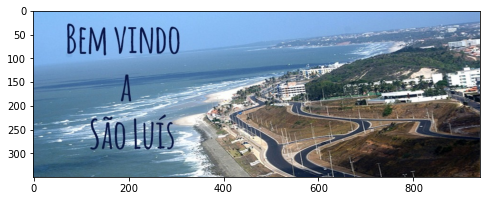

In [ ]:
imagem = cv2.imread('dados/sample_02.jpeg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,18))
plt.imshow(imagem_rgb)

In [ ]:
text = pytesseract.image_to_string(Image.open('dados/sample_02.jpeg'))
print(text)

BEM VINDO
L, » ' A
 

   


